### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the FEMA dataset the csv file


In [4]:
fema_df=pd.read_csv("..\data_raw\DisasterDeclarationsSummaries.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mahit\AppData\Local\Temp\ipykernel_22884\68880482.py:1: SyntaxWarning: invalid escape sequence '\d'
  fema_df=pd.read_csv("..\data_raw\DisasterDeclarationsSummaries.csv")
C:\Users\mahit\AppData\Local\Temp\ipykernel_22884\68880482.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  fema_df=pd.read_csv("..\data_raw\DisasterDeclarationsSummaries.csv")


In [5]:
fema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68542 entries, 0 to 68541
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     68542 non-null  object
 1   disasterNumber            68542 non-null  int64 
 2   state                     68542 non-null  object
 3   declarationType           68542 non-null  object
 4   declarationDate           68542 non-null  object
 5   fyDeclared                68542 non-null  int64 
 6   incidentType              68542 non-null  object
 7   declarationTitle          68542 non-null  object
 8   ihProgramDeclared         68542 non-null  int64 
 9   iaProgramDeclared         68542 non-null  int64 
 10  paProgramDeclared         68542 non-null  int64 
 11  hmProgramDeclared         68542 non-null  int64 
 12  incidentBeginDate         68542 non-null  object
 13  incidentEndDate           68018 non-null  object
 14  disasterCloseoutDate  

In [6]:
fema_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,...,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
1,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,...,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
2,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,...,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
3,DR-4312-CA,4312,CA,DR,2017-05-02T00:00:00.000Z,2017,Severe Storm,FLOODING,0,0,...,60347,Resighini Rancheria (Indian Reservation),17035,NaN,2017041001,9,NaN,2025-03-26T20:21:32.579Z,432a3a64bdbb291ae26cf5a27a33deeabb380481,98a7c5bb-2346-45aa-a1ca-0399440d4f0b
4,DR-4251-AL,4251,AL,DR,2016-01-21T00:00:00.000Z,2016,Severe Storm,"SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS,...",0,0,...,99001,Autauga (County),16003,NaN,2015122301,4,NaN,2025-03-27T12:21:46.559Z,dcd4ce6b37ee49875b3f1e32e9a8a16cd6a803d3,5229bbae-eee6-42b8-b277-edbafa8d6cb2


In [7]:
columns_to_keep = [
    'disasterNumber',
    'state',
    'declarationDate',
    'incidentType',
    'fyDeclared',
    'incidentBeginDate',
    'incidentEndDate',
    'iaProgramDeclared',
    'paProgramDeclared',
    'hmProgramDeclared',
    'region'
]

fema_clean = fema_df[columns_to_keep].copy()


In [8]:
fema_clean.head()

,disasterNumber,state,declarationDate,incidentType,fyDeclared,incidentBeginDate,incidentEndDate,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,region
0,5529,OR,2024-08-09T00:00:00.000Z,Fire,2024,2024-08-08T00:00:00.000Z,NaN,0,1,1,10
1,5528,OR,2024-08-06T00:00:00.000Z,Fire,2024,2024-08-04T00:00:00.000Z,NaN,0,1,1,10
2,5527,OR,2024-08-02T00:00:00.000Z,Fire,2024,2024-08-02T00:00:00.000Z,NaN,0,1,1,10
3,4312,CA,2017-05-02T00:00:00.000Z,Severe Storm,2017,2017-02-08T00:00:00.000Z,2017-02-11T00:00:00.000Z,0,1,1,9
4,4251,AL,2016-01-21T00:00:00.000Z,Severe Storm,2016,2015-12-23T00:00:00.000Z,2015-12-31T00:00:00.000Z,0,1,1,4


In [9]:
fema_df.describe()

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,incidentId,region
count,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,6.854200e+04,68542.000000
mean,2697.745309,2005.626900,0.169662,0.250751,0.934595,0.437994,0.002436,31.409238,97.378294,96473.341309,34319.997228,1.603161e+09,5.194217
std,1442.434048,15.109524,0.375339,0.433449,0.247241,0.496144,0.049301,16.647194,101.641745,13671.723936,33908.743661,1.253601e+09,2.121830
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,5.300300e+04,1.000000
25%,1376.000000,1998.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,31.000000,99029.000000,9043.000000,9.803325e+04,4.000000
50%,3160.000000,2008.000000,0.000000,0.000000,1.000000,0.000000,0.000000,29.000000,75.000000,99073.000000,20057.000000,2.008083e+09,5.000000
75%,4024.000000,2020.000000,0.000000,1.000000,1.000000,1.000000,0.000000,46.000000,127.000000,99125.000000,72051.000000,2.020031e+09,7.000000
max,5615.000000,2026.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,840.000000,99507.000000,99159.000000,9.062400e+09,10.000000


### Datatype Conversion

In [ ]:
# Converting date columns to datetime
date_cols = ['declarationDate', 'incidentBeginDate', 'incidentEndDate']
for col in date_cols:
    fema_clean[col] = pd.to_datetime(fema_clean[col], errors='coerce')

In [11]:
fema_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68542 entries, 0 to 68541
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   disasterNumber     68542 non-null  int64              
 1   state              68542 non-null  object             
 2   declarationDate    68542 non-null  datetime64[ns, UTC]
 3   incidentType       68542 non-null  object             
 4   fyDeclared         68542 non-null  int64              
 5   incidentBeginDate  68542 non-null  datetime64[ns, UTC]
 6   incidentEndDate    68018 non-null  datetime64[ns, UTC]
 7   iaProgramDeclared  68542 non-null  int64              
 8   paProgramDeclared  68542 non-null  int64              
 9   hmProgramDeclared  68542 non-null  int64              
 10  region             68542 non-null  int64              
dtypes: datetime64[ns, UTC](3), int64(6), object(2)
memory usage: 5.8+ MB


In [12]:
fema_clean.reset_index(drop=True, inplace=True)

In [13]:
print(fema_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68542 entries, 0 to 68541
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   disasterNumber     68542 non-null  int64              
 1   state              68542 non-null  object             
 2   declarationDate    68542 non-null  datetime64[ns, UTC]
 3   incidentType       68542 non-null  object             
 4   fyDeclared         68542 non-null  int64              
 5   incidentBeginDate  68542 non-null  datetime64[ns, UTC]
 6   incidentEndDate    68018 non-null  datetime64[ns, UTC]
 7   iaProgramDeclared  68542 non-null  int64              
 8   paProgramDeclared  68542 non-null  int64              
 9   hmProgramDeclared  68542 non-null  int64              
 10  region             68542 non-null  int64              
dtypes: datetime64[ns, UTC](3), int64(6), object(2)
memory usage: 5.8+ MB
None


In [14]:
fema_clean.describe()

,disasterNumber,fyDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,region
count,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000,68542.000000
mean,2697.745309,2005.626900,0.250751,0.934595,0.437994,5.194217
std,1442.434048,15.109524,0.433449,0.247241,0.496144,2.121830
min,1.000000,1953.000000,0.000000,0.000000,0.000000,1.000000
25%,1376.000000,1998.000000,0.000000,1.000000,0.000000,4.000000
50%,3160.000000,2008.000000,0.000000,1.000000,0.000000,5.000000
75%,4024.000000,2020.000000,1.000000,1.000000,1.000000,7.000000
max,5615.000000,2026.000000,1.000000,1.000000,1.000000,10.000000


In [15]:
fema_clean['duration_days'] = (fema_clean['incidentEndDate'] - fema_clean['incidentBeginDate']).dt.days



In [16]:
fema_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68542 entries, 0 to 68541
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   disasterNumber     68542 non-null  int64              
 1   state              68542 non-null  object             
 2   declarationDate    68542 non-null  datetime64[ns, UTC]
 3   incidentType       68542 non-null  object             
 4   fyDeclared         68542 non-null  int64              
 5   incidentBeginDate  68542 non-null  datetime64[ns, UTC]
 6   incidentEndDate    68018 non-null  datetime64[ns, UTC]
 7   iaProgramDeclared  68542 non-null  int64              
 8   paProgramDeclared  68542 non-null  int64              
 9   hmProgramDeclared  68542 non-null  int64              
 10  region             68542 non-null  int64              
 11  duration_days      68018 non-null  float64            
dtypes: datetime64[ns, UTC](3), float64(1), int64(6

In [17]:
# Count of disasters by state
fema_clean['state'].value_counts().head(10)



state
TX    5386
KY    3235
MO    2830
FL    2791
GA    2653
VA    2621
LA    2589
OK    2582
NC    2329
PR    2116
Name: count, dtype: int64

In [18]:
# Count of disasters by incident type
fema_clean['incidentType'].value_counts()


incidentType
Severe Storm           19299
Hurricane              13721
Flood                  11227
Biological              7857
Fire                    3844
Snowstorm               3707
Severe Ice Storm        2956
Tornado                 1623
Drought                 1292
Tropical Storm          1059
Coastal Storm            637
Other                    313
Freezing                 301
Earthquake               228
Winter Storm             149
Typhoon                  130
Volcanic Eruption         51
Mud/Landslide             44
Fishing Losses            42
Dam/Levee Break           13
Tsunami                    9
Toxic Substances           9
Chemical                   9
Human Cause                7
Tropical Depression        7
Terrorist                  5
Straight-Line Winds        3
Name: count, dtype: int64

In [19]:
fema_clean.isnull().sum()


disasterNumber         0
state                  0
declarationDate        0
incidentType           0
fyDeclared             0
incidentBeginDate      0
incidentEndDate      524
iaProgramDeclared      0
paProgramDeclared      0
hmProgramDeclared      0
region                 0
duration_days        524
dtype: int64

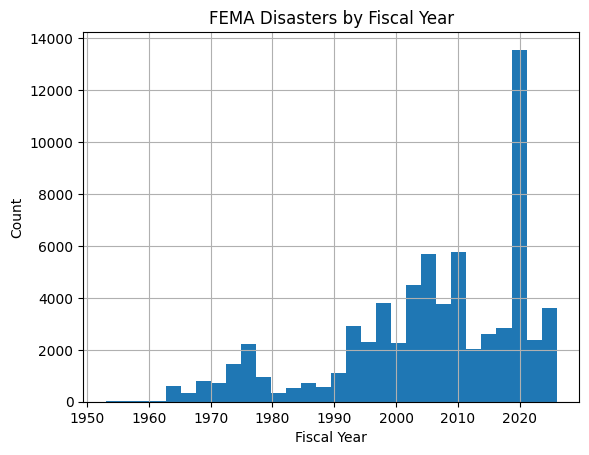

In [20]:
import matplotlib.pyplot as plt

# Histogram of FEMA disasters per fiscal year
fema_clean['fyDeclared'].hist(bins=30)
plt.title("FEMA Disasters by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Count")
plt.show()


In [21]:
fema_clean.to_csv(r"..\data_clean\fema_clean.csv", index=False)
